# Install

In [ ]:
pip install fuzzytree

In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#MAX Depth 3

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bab-iv/ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
# df = df.drop(columns=['Height', 'Weight'])
df = df.drop(columns=['SMOKE','SCC','FAVC','MTRANS','CALC','family_history_with_overweight','CAEC'])
# print(df.shape)

In [ ]:
df.dtypes

Gender         object
Age           float64
Height        float64
Weight        float64
FCVC          float64
NCP           float64
CH2O          float64
FAF           float64
TUE           float64
NObeyesdad     object
dtype: object

In [ ]:
# Convert object/text variables to category variables
# columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

#IF SMOKE DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC",  "SCC", "CALC", "MTRANS", "NObeyesdad"]
#IF SMOKE,SCC DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "CALC", "MTRANS", "NObeyesdad"]
#IF SMOKE,SCC,FAVC DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "CAEC", "CALC", "MTRANS", "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "CAEC", "CALC", "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS, CALC DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "CAEC",  "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS, CALC, family_history_with_overweigh DIHAPUS
# columns = ["Gender", "CAEC",  "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS, CALC, family_history_with_overweigh,CAEC DIHAPUS
columns = ["Gender", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [ ]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [ ]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')

# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Gender      2111 non-null   category
 1   Age         2111 non-null   float64 
 2   Height      2111 non-null   float64 
 3   Weight      2111 non-null   float64 
 4   FCVC        2111 non-null   int64   
 5   NCP         2111 non-null   int64   
 6   CH2O        2111 non-null   int64   
 7   FAF         2111 non-null   int64   
 8   TUE         2111 non-null   int64   
 9   NObeyesdad  2111 non-null   category
dtypes: category(2), float64(3), int64(5)
memory usage: 136.7 KB


In [ ]:
df_prep = df.copy()

In [ ]:
# create dummy variables untuk ALL FEATURES
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])

#IF FITUR SMOKE DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","SCC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC, FAVC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC","CALC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender",
#                                           "CAEC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh, CAEC DIHAPUS
df_prep = pd.get_dummies(df_prep,columns=["Gender",])

df_prep

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male
0,21.000000,1.620000,64.000000,2,3,2,0,1,Normal_Weight,1,0
1,21.000000,1.520000,56.000000,3,3,3,3,0,Normal_Weight,1,0
2,23.000000,1.800000,77.000000,2,3,2,2,1,Normal_Weight,0,1
3,27.000000,1.800000,87.000000,3,3,2,2,0,Overweight_Level_I,0,1
4,22.000000,1.780000,89.800000,2,1,2,0,0,Overweight_Level_II,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3,3,2,2,1,Obesity_Type_III,1,0
2107,21.982942,1.748584,133.742943,3,3,2,1,1,Obesity_Type_III,1,0
2108,22.524036,1.752206,133.689352,3,3,2,1,1,Obesity_Type_III,1,0
2109,24.361936,1.739450,133.346641,3,3,3,1,1,Obesity_Type_III,1,0


In [ ]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad"])

# Target variable
y = df_prep['NObeyesdad']

In [ ]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: category
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                         'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from fuzzytree import FuzzyDecisionTreeClassifier

from sklearn.preprocessing import Normalizer # Import for standard scaling of the data

In [ ]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

#normalisasi
nor = Normalizer()
X_train_n_scaled = nor.fit_transform(X_train)
X_test_n_scaled = nor.transform(X_test)

# nor = Normalizer()
kedalaman=5

X_test_mm_scaled

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):

    models = [
          ('Decision Tree', DecisionTreeClassifier()),
          ('Fuzzy Decision Tree',FuzzyDecisionTreeClassifier(fuzziness=1,max_depth=3, criterion='entropy'))
        ]

    for name, model in models:

        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)

        # normalizer scaled data
        clf_n_scaled = model.fit(X_train_n_scaled, y_train)
        y_pred_n_scaled = clf_scaled.predict(X_test_n_scaled)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        scaled_n_accuracy = round(metrics.accuracy_score(y_test, y_pred_n_scaled),5)

        # output
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_n_accuracy)
        print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
        print("                            -----------------------------------               \n")

        #ditambah recall, precision, f1-score, report classification

In [ ]:
X_test_mm_scaled

array([[0.35309855, 0.86919245, 0.67337842, ..., 0.        , 0.        ,
        1.        ],
       [0.08510638, 0.41509434, 0.3880597 , ..., 0.5       , 1.        ,
        0.        ],
       [0.32242355, 0.6106717 , 0.35873309, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.25531915, 0.38963019, 0.54472428, ..., 0.        , 1.        ,
        0.        ],
       [0.24558413, 0.5909717 , 0.56797112, ..., 0.5       , 0.        ,
        1.        ],
       [0.38915234, 0.57538868, 0.60521501, ..., 0.5       , 0.        ,
        1.        ]])

In [ ]:
run_models(X_train, y_train, X_test, y_test)

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.9409
Accuracy w/Scaled Data (ss): 0.94563
Accuracy w/Scaled Data (mm): 0.95272
Accuracy w/Scaled Data (mm): 0.88652

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.97      0.94      0.95        65
      Normal_Weight       0.85      0.89      0.87        57
     Obesity_Type_I       0.94      0.99      0.96        67
    Obesity_Type_II       0.98      0.98      0.98        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.93      0.88      0.90        57
Overweight_Level_II       0.94      0.93      0.94        55

           accuracy                           0.95       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423

                            -----------------------------------               



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FuzzyDecisionTreeClassifier was fitted without feature names
  warnings.warn(


Fuzzy Decision Tree:
---------------------------------------------------------------
Accuracy: 0.65721
Accuracy w/Scaled Data (ss): 0.65721
Accuracy w/Scaled Data (mm): 0.65721
Accuracy w/Scaled Data (mm): 0.69976

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.63      0.98      0.77        65
      Normal_Weight       0.39      0.25      0.30        57
     Obesity_Type_I       0.57      0.57      0.57        67
    Obesity_Type_II       0.72      1.00      0.83        53
   Obesity_Type_III       0.97      1.00      0.99        69
 Overweight_Level_I       0.53      0.35      0.42        57
Overweight_Level_II       0.56      0.36      0.44        55

           accuracy                           0.66       423
          macro avg       0.62      0.64      0.62       423
       weighted avg       0.63      0.66      0.63       423

                            -----------------------------------               



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_sk = DecisionTreeClassifier(max_depth=3, criterion = 'entropy').fit(X_train, y_train)
y_pred2 = clf_sk.predict(X_test)

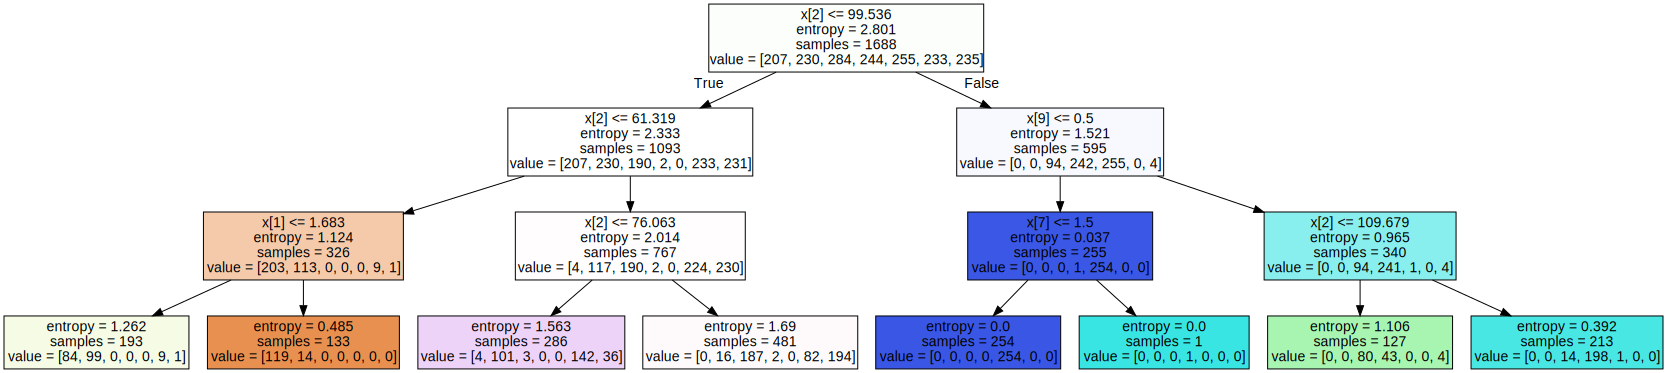

In [ ]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_sk,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
from sklearn.tree import export_text

In [ ]:
tree_rules = export_text(clf_sk, feature_names=list(X_train.columns))
tree_rules

'|--- Weight <= 99.54\n|   |--- Weight <= 61.32\n|   |   |--- Height <= 1.68\n|   |   |   |--- class: Normal_Weight\n|   |   |--- Height >  1.68\n|   |   |   |--- class: Insufficient_Weight\n|   |--- Weight >  61.32\n|   |   |--- Weight <= 76.06\n|   |   |   |--- class: Overweight_Level_I\n|   |   |--- Weight >  76.06\n|   |   |   |--- class: Overweight_Level_II\n|--- Weight >  99.54\n|   |--- Gender_Male <= 0.50\n|   |   |--- TUE <= 1.50\n|   |   |   |--- class: Obesity_Type_III\n|   |   |--- TUE >  1.50\n|   |   |   |--- class: Obesity_Type_II\n|   |--- Gender_Male >  0.50\n|   |   |--- Weight <= 109.68\n|   |   |   |--- class: Obesity_Type_I\n|   |   |--- Weight >  109.68\n|   |   |   |--- class: Obesity_Type_II\n'

#Max Depth 5

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bab-iv/ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
# df = df.drop(columns=['Height', 'Weight'])
df = df.drop(columns=['SMOKE','SCC','FAVC','MTRANS','CALC','family_history_with_overweight','CAEC'])
# print(df.shape)

In [ ]:
columns = ["Gender", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [ ]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [ ]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')

# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Gender      2111 non-null   category
 1   Age         2111 non-null   float64 
 2   Height      2111 non-null   float64 
 3   Weight      2111 non-null   float64 
 4   FCVC        2111 non-null   int64   
 5   NCP         2111 non-null   int64   
 6   CH2O        2111 non-null   int64   
 7   FAF         2111 non-null   int64   
 8   TUE         2111 non-null   int64   
 9   NObeyesdad  2111 non-null   category
dtypes: category(2), float64(3), int64(5)
memory usage: 136.7 KB


In [ ]:
df_prep = df.copy()

In [ ]:
# create dummy variables untuk ALL FEATURES
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])

#IF FITUR SMOKE DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","SCC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC, FAVC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC","CALC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender",
#                                           "CAEC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh, CAEC DIHAPUS
df_prep = pd.get_dummies(df_prep,columns=["Gender",])

df_prep

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male
0,21.000000,1.620000,64.000000,2,3,2,0,1,Normal_Weight,1,0
1,21.000000,1.520000,56.000000,3,3,3,3,0,Normal_Weight,1,0
2,23.000000,1.800000,77.000000,2,3,2,2,1,Normal_Weight,0,1
3,27.000000,1.800000,87.000000,3,3,2,2,0,Overweight_Level_I,0,1
4,22.000000,1.780000,89.800000,2,1,2,0,0,Overweight_Level_II,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3,3,2,2,1,Obesity_Type_III,1,0
2107,21.982942,1.748584,133.742943,3,3,2,1,1,Obesity_Type_III,1,0
2108,22.524036,1.752206,133.689352,3,3,2,1,1,Obesity_Type_III,1,0
2109,24.361936,1.739450,133.346641,3,3,3,1,1,Obesity_Type_III,1,0


In [ ]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad"])

# Target variable
y = df_prep['NObeyesdad']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from fuzzytree import FuzzyDecisionTreeClassifier

from sklearn.preprocessing import Normalizer # Import for standard scaling of the data

In [ ]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

#normalisasi
nor = Normalizer()
X_train_n_scaled = nor.fit_transform(X_train)
X_test_n_scaled = nor.transform(X_test)

# nor = Normalizer()
kedalaman=5

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):

    models = [
          ('Decision Tree', DecisionTreeClassifier()),
          ('Fuzzy Decision Tree',FuzzyDecisionTreeClassifier(fuzziness=0.1,max_depth=5, criterion='entropy'))
        ]

    for name, model in models:

        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)

        # normalizer scaled data
        clf_n_scaled = model.fit(X_train_n_scaled, y_train)
        y_pred_n_scaled = clf_scaled.predict(X_test_n_scaled)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        scaled_n_accuracy = round(metrics.accuracy_score(y_test, y_pred_n_scaled),5)

        # output
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_n_accuracy)
        print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
        print("                            -----------------------------------               \n")

        #ditambah recall, precision, f1-score, report classification

In [ ]:
run_models(X_train, y_train, X_test, y_test)

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.9409
Accuracy w/Scaled Data (ss): 0.94563
Accuracy w/Scaled Data (mm): 0.9409
Accuracy w/Scaled Data (mm): 0.90544

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.95      0.95      0.95        65
      Normal_Weight       0.85      0.88      0.86        57
     Obesity_Type_I       0.96      0.99      0.97        67
    Obesity_Type_II       0.98      0.98      0.98        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.92      0.86      0.89        57
Overweight_Level_II       0.95      0.95      0.95        55

           accuracy                           0.95       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423

                            -----------------------------------               



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FuzzyDecisionTreeClassifier was fitted without feature names
  warnings.warn(


Fuzzy Decision Tree:
---------------------------------------------------------------
Accuracy: 0.82979
Accuracy w/Scaled Data (ss): 0.82979
Accuracy w/Scaled Data (mm): 0.82979
Accuracy w/Scaled Data (mm): 0.89598

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.88      0.90        65
      Normal_Weight       0.77      0.77      0.77        57
     Obesity_Type_I       0.78      0.94      0.85        67
    Obesity_Type_II       0.98      0.98      0.98        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.79      0.53      0.63        57
Overweight_Level_II       0.57      0.65      0.61        55

           accuracy                           0.83       423
          macro avg       0.83      0.82      0.82       423
       weighted avg       0.84      0.83      0.83       423

                            -----------------------------------               



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_sk = DecisionTreeClassifier(criterion = 'entropy', max_depth=5).fit(X_train, y_train)
y_pred2 = clf_sk.predict(X_test)

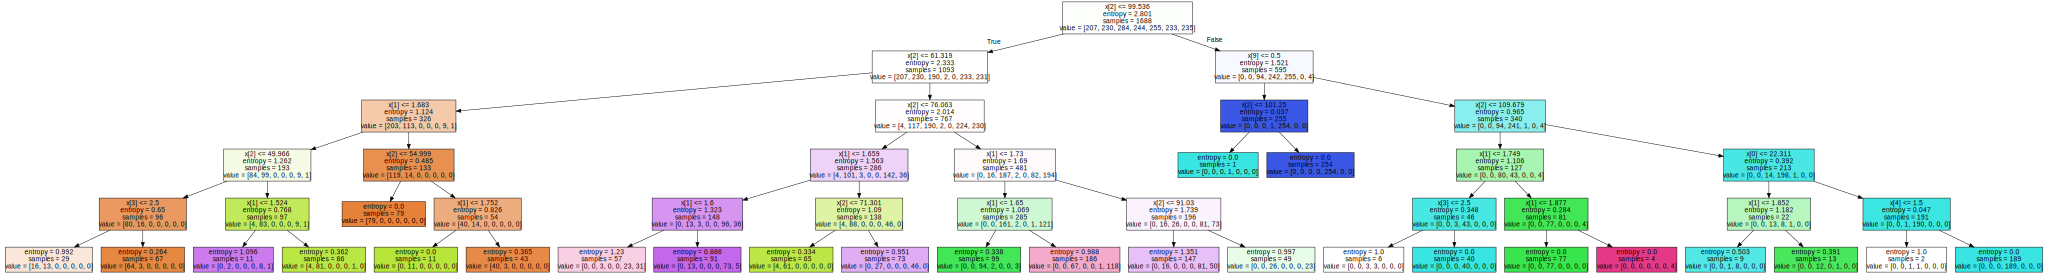

In [ ]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_sk,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(clf_sk, feature_names=list(X_train.columns))
tree_rules

'|--- Weight <= 99.54\n|   |--- Weight <= 61.32\n|   |   |--- Height <= 1.68\n|   |   |   |--- Weight <= 49.97\n|   |   |   |   |--- FCVC <= 2.50\n|   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |--- FCVC >  2.50\n|   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |--- Weight >  49.97\n|   |   |   |   |--- Height <= 1.52\n|   |   |   |   |   |--- class: Overweight_Level_I\n|   |   |   |   |--- Height >  1.52\n|   |   |   |   |   |--- class: Normal_Weight\n|   |   |--- Height >  1.68\n|   |   |   |--- Weight <= 55.00\n|   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |--- Weight >  55.00\n|   |   |   |   |--- Height <= 1.75\n|   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |--- Height >  1.75\n|   |   |   |   |   |--- class: Insufficient_Weight\n|   |--- Weight >  61.32\n|   |   |--- Weight <= 76.06\n|   |   |   |--- Height <= 1.66\n|   |   |   |   |--- Height <= 1.60\n|   |   |   |   |   |--- class: Overweight_Level_II\n|   | 

#Max Depth 8

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bab-iv/ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
# df = df.drop(columns=['Height', 'Weight'])
df = df.drop(columns=['SMOKE','SCC','FAVC','MTRANS','CALC','family_history_with_overweight','CAEC'])
# print(df.shape)

In [ ]:

#IF SMOKE,SCC,FAVC, MTRANS, CALC, family_history_with_overweigh,CAEC DIHAPUS
columns = ["Gender", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [ ]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [ ]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')

# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Gender      2111 non-null   category
 1   Age         2111 non-null   float64 
 2   Height      2111 non-null   float64 
 3   Weight      2111 non-null   float64 
 4   FCVC        2111 non-null   int64   
 5   NCP         2111 non-null   int64   
 6   CH2O        2111 non-null   int64   
 7   FAF         2111 non-null   int64   
 8   TUE         2111 non-null   int64   
 9   NObeyesdad  2111 non-null   category
dtypes: category(2), float64(3), int64(5)
memory usage: 136.7 KB


In [ ]:
df_prep = df.copy()

In [ ]:
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh, CAEC DIHAPUS
df_prep = pd.get_dummies(df_prep,columns=["Gender",])

df_prep

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male
0,21.000000,1.620000,64.000000,2,3,2,0,1,Normal_Weight,1,0
1,21.000000,1.520000,56.000000,3,3,3,3,0,Normal_Weight,1,0
2,23.000000,1.800000,77.000000,2,3,2,2,1,Normal_Weight,0,1
3,27.000000,1.800000,87.000000,3,3,2,2,0,Overweight_Level_I,0,1
4,22.000000,1.780000,89.800000,2,1,2,0,0,Overweight_Level_II,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3,3,2,2,1,Obesity_Type_III,1,0
2107,21.982942,1.748584,133.742943,3,3,2,1,1,Obesity_Type_III,1,0
2108,22.524036,1.752206,133.689352,3,3,2,1,1,Obesity_Type_III,1,0
2109,24.361936,1.739450,133.346641,3,3,3,1,1,Obesity_Type_III,1,0


In [ ]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad"])

# Target variable
y = df_prep['NObeyesdad']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from fuzzytree import FuzzyDecisionTreeClassifier

from sklearn.preprocessing import Normalizer # Import for standard scaling of the data

In [ ]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

#normalisasi
nor = Normalizer()
X_train_n_scaled = nor.fit_transform(X_train)
X_test_n_scaled = nor.transform(X_test)

# nor = Normalizer()
kedalaman=5

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):

    models = [
          ('Decision Tree', DecisionTreeClassifier()),
          ('Fuzzy Decision Tree',FuzzyDecisionTreeClassifier(fuzziness=0.1,max_depth=8, criterion='entropy'))
        ]

    for name, model in models:

        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)

        # normalizer scaled data
        clf_n_scaled = model.fit(X_train_n_scaled, y_train)
        y_pred_n_scaled = clf_scaled.predict(X_test_n_scaled)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        scaled_n_accuracy = round(metrics.accuracy_score(y_test, y_pred_n_scaled),5)

        # output
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_n_accuracy)
        print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
        print("                            -----------------------------------               \n")

        #ditambah recall, precision, f1-score, report classification

In [ ]:
run_models(X_train, y_train, X_test, y_test)

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.9409
Accuracy w/Scaled Data (ss): 0.94799
Accuracy w/Scaled Data (mm): 0.95035
Accuracy w/Scaled Data (mm): 0.90071

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.95      0.95      0.95        65
      Normal_Weight       0.86      0.88      0.87        57
     Obesity_Type_I       0.96      0.99      0.97        67
    Obesity_Type_II       0.98      0.98      0.98        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.93      0.88      0.90        57
Overweight_Level_II       0.95      0.95      0.95        55

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423

                            -----------------------------------               



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FuzzyDecisionTreeClassifier was fitted without feature names
  warnings.warn(


Fuzzy Decision Tree:
---------------------------------------------------------------
Accuracy: 0.9669
Accuracy w/Scaled Data (ss): 0.9669
Accuracy w/Scaled Data (mm): 0.9669
Accuracy w/Scaled Data (mm): 0.93617

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.98      0.97        65
      Normal_Weight       0.95      0.93      0.94        57
     Obesity_Type_I       1.00      0.99      0.99        67
    Obesity_Type_II       1.00      1.00      1.00        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       1.00      0.86      0.92        57
Overweight_Level_II       0.87      1.00      0.93        55

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423

                            -----------------------------------               



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_sk = DecisionTreeClassifier(criterion = 'entropy', max_depth=8).fit(X_train, y_train)
y_pred2 = clf_sk.predict(X_test)

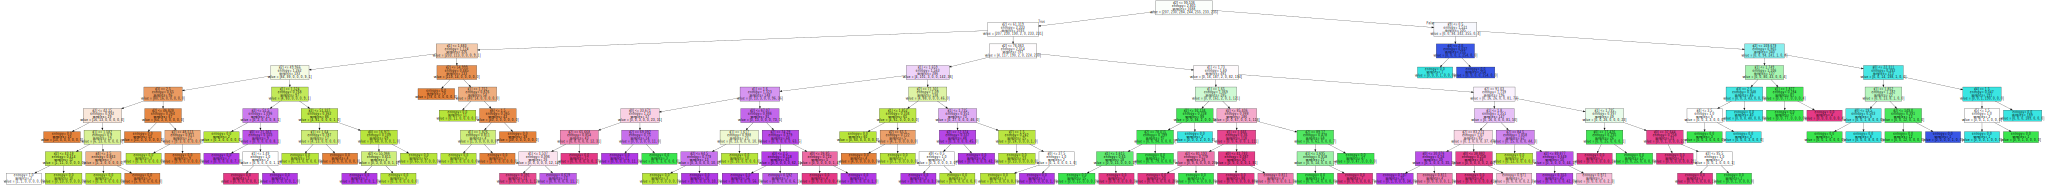

In [ ]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_sk,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(clf_sk, feature_names=list(X_train.columns))
tree_rules

'|--- Weight <= 99.54\n|   |--- Weight <= 61.32\n|   |   |--- Height <= 1.68\n|   |   |   |--- Weight <= 49.97\n|   |   |   |   |--- FCVC <= 2.50\n|   |   |   |   |   |--- Weight <= 42.15\n|   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |   |--- Weight >  42.15\n|   |   |   |   |   |   |--- Height <= 1.58\n|   |   |   |   |   |   |   |--- Weight <= 43.18\n|   |   |   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |   |   |   |--- Weight >  43.18\n|   |   |   |   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |   |   |--- Height >  1.58\n|   |   |   |   |   |   |   |--- NCP <= 1.50\n|   |   |   |   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |   |   |   |--- NCP >  1.50\n|   |   |   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |--- FCVC >  2.50\n|   |   |   |   |   |--- Weight <= 46.83\n|   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |   |--- Weight >  46.83\n|   | 

#Max Depth 10

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bab-iv/ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
# df = df.drop(columns=['Height', 'Weight'])
df = df.drop(columns=['SMOKE','SCC','FAVC','MTRANS','CALC','family_history_with_overweight','CAEC'])
# print(df.shape)

In [ ]:
#IF SMOKE,SCC,FAVC, MTRANS, CALC, family_history_with_overweigh,CAEC DIHAPUS
columns = ["Gender", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [ ]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [ ]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')

# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Gender      2111 non-null   category
 1   Age         2111 non-null   float64 
 2   Height      2111 non-null   float64 
 3   Weight      2111 non-null   float64 
 4   FCVC        2111 non-null   int64   
 5   NCP         2111 non-null   int64   
 6   CH2O        2111 non-null   int64   
 7   FAF         2111 non-null   int64   
 8   TUE         2111 non-null   int64   
 9   NObeyesdad  2111 non-null   category
dtypes: category(2), float64(3), int64(5)
memory usage: 136.7 KB


In [ ]:
df_prep = df.copy()

In [ ]:
# create dummy variables untuk ALL FEATURES
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])

#IF FITUR SMOKE DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","SCC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC, FAVC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC","CALC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender",
#                                           "CAEC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh, CAEC DIHAPUS
df_prep = pd.get_dummies(df_prep,columns=["Gender",])

df_prep

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male
0,21.000000,1.620000,64.000000,2,3,2,0,1,Normal_Weight,1,0
1,21.000000,1.520000,56.000000,3,3,3,3,0,Normal_Weight,1,0
2,23.000000,1.800000,77.000000,2,3,2,2,1,Normal_Weight,0,1
3,27.000000,1.800000,87.000000,3,3,2,2,0,Overweight_Level_I,0,1
4,22.000000,1.780000,89.800000,2,1,2,0,0,Overweight_Level_II,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3,3,2,2,1,Obesity_Type_III,1,0
2107,21.982942,1.748584,133.742943,3,3,2,1,1,Obesity_Type_III,1,0
2108,22.524036,1.752206,133.689352,3,3,2,1,1,Obesity_Type_III,1,0
2109,24.361936,1.739450,133.346641,3,3,3,1,1,Obesity_Type_III,1,0


In [ ]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad"])

# Target variable
y = df_prep['NObeyesdad']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from fuzzytree import FuzzyDecisionTreeClassifier

from sklearn.preprocessing import Normalizer # Import for standard scaling of the data

In [ ]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

#normalisasi
nor = Normalizer()
X_train_n_scaled = nor.fit_transform(X_train)
X_test_n_scaled = nor.transform(X_test)

# nor = Normalizer()
kedalaman=5

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):

    models = [
          ('Decision Tree', DecisionTreeClassifier()),
          ('Fuzzy Decision Tree',FuzzyDecisionTreeClassifier(fuzziness=0.1,max_depth=10, criterion='entropy'))
        ]

    for name, model in models:

        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)

        # normalizer scaled data
        clf_n_scaled = model.fit(X_train_n_scaled, y_train)
        y_pred_n_scaled = clf_scaled.predict(X_test_n_scaled)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        scaled_n_accuracy = round(metrics.accuracy_score(y_test, y_pred_n_scaled),5)

        # output
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_n_accuracy)
        print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
        print("                            -----------------------------------               \n")

        #ditambah recall, precision, f1-score, report classification

In [ ]:
run_models(X_train, y_train, X_test, y_test)

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.94799
Accuracy w/Scaled Data (ss): 0.93853
Accuracy w/Scaled Data (mm): 0.95272
Accuracy w/Scaled Data (mm): 0.89835

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.92      0.92        65
      Normal_Weight       0.82      0.86      0.84        57
     Obesity_Type_I       0.96      0.99      0.97        67
    Obesity_Type_II       0.98      0.98      0.98        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.92      0.86      0.89        57
Overweight_Level_II       0.96      0.95      0.95        55

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423

                            -----------------------------------               



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FuzzyDecisionTreeClassifier was fitted without feature names
  warnings.warn(


Fuzzy Decision Tree:
---------------------------------------------------------------
Accuracy: 0.98345
Accuracy w/Scaled Data (ss): 0.98345
Accuracy w/Scaled Data (mm): 0.98345
Accuracy w/Scaled Data (mm): 0.93144

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.98      0.97        65
      Normal_Weight       0.95      0.93      0.94        57
     Obesity_Type_I       1.00      1.00      1.00        67
    Obesity_Type_II       1.00      1.00      1.00        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       1.00      0.96      0.98        57
Overweight_Level_II       0.98      1.00      0.99        55

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

                            -----------------------------------               



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_sk = DecisionTreeClassifier(criterion = 'entropy', max_depth=10).fit(X_train, y_train)
y_pred2 = clf_sk.predict(X_test)

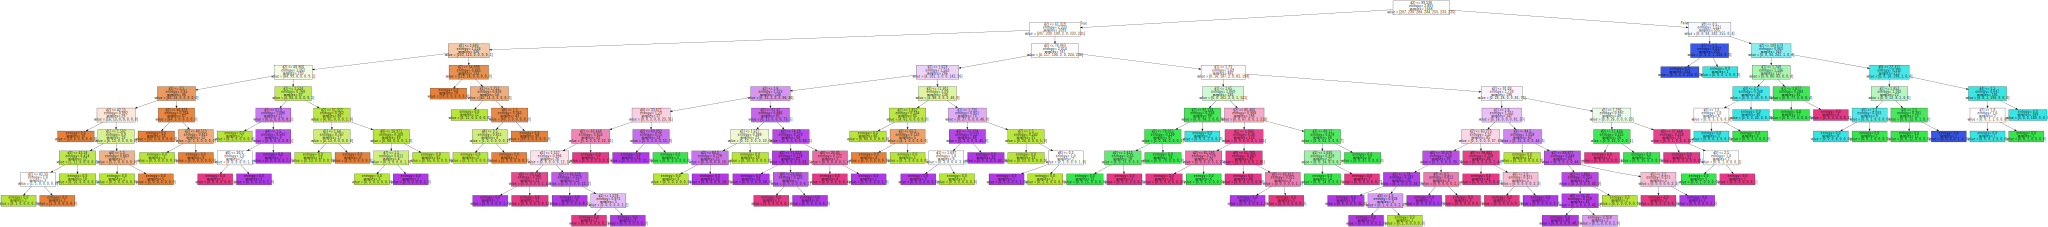

In [ ]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_sk,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
from sklearn.tree import export_text

In [ ]:
tree_rules = export_text(clf_sk, feature_names=list(X_train.columns))

In [ ]:
tree_rules

'|--- Weight <= 99.54\n|   |--- Weight <= 61.32\n|   |   |--- Height <= 1.68\n|   |   |   |--- Weight <= 49.97\n|   |   |   |   |--- FCVC <= 2.50\n|   |   |   |   |   |--- Weight <= 42.15\n|   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |   |--- Weight >  42.15\n|   |   |   |   |   |   |--- Height <= 1.58\n|   |   |   |   |   |   |   |--- Weight <= 43.18\n|   |   |   |   |   |   |   |   |--- Weight <= 42.33\n|   |   |   |   |   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |   |   |   |   |--- Weight >  42.33\n|   |   |   |   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |   |   |   |--- Weight >  43.18\n|   |   |   |   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |   |   |--- Height >  1.58\n|   |   |   |   |   |   |   |--- NCP <= 1.50\n|   |   |   |   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |   |   |   |--- NCP >  1.50\n|   |   |   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |  

#max depth 15

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bab-iv/ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
# df = df.drop(columns=['Height', 'Weight'])
# df = df.drop(columns=['SMOKE','SCC','FAVC','MTRANS','CALC','family_history_with_overweight','CAEC'])
df = df.drop(columns=['SMOKE'])
# print(df.shape)

In [ ]:
# Convert object/text variables to category variables
# columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

#IF SMOKE DIHAPUS
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC",  "SCC", "CALC", "MTRANS", "NObeyesdad"]
#IF SMOKE,SCC DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "CALC", "MTRANS", "NObeyesdad"]
#IF SMOKE,SCC,FAVC DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "CAEC", "CALC", "MTRANS", "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "CAEC", "CALC", "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS, CALC DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "CAEC",  "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS, CALC, family_history_with_overweigh DIHAPUS
# columns = ["Gender", "CAEC",  "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS, CALC, family_history_with_overweigh,CAEC DIHAPUS
# columns = ["Gender", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [ ]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [ ]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')

# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   int64   
 7   NCP                             2111 non-null   int64   
 8   CAEC                            2111 non-null   category
 9   CH2O                            2111 non-null   int64   
 10  SCC                             2111 non-null   category
 11  FAF                             2111 non-null   int64   
 12  TUE                 

In [ ]:
df_prep = df.copy()

In [ ]:
# create dummy variables untuk ALL FEATURES
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])

#IF FITUR SMOKE DIHAPUS
df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SCC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC, FAVC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC","CALC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender",
#                                           "CAEC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh, CAEC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender",])

df_prep

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2,3,2,0,1,Normal_Weight,1,...,0,0,0,0,1,0,0,0,1,0
1,21.000000,1.520000,56.000000,3,3,3,3,0,Normal_Weight,1,...,1,0,0,1,0,0,0,0,1,0
2,23.000000,1.800000,77.000000,2,3,2,2,1,Normal_Weight,0,...,0,0,1,0,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3,3,2,2,0,Overweight_Level_I,0,...,0,0,1,0,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2,1,2,0,0,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3,3,2,2,1,Obesity_Type_III,1,...,0,0,0,1,0,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3,3,2,1,1,Obesity_Type_III,1,...,0,0,0,1,0,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3,3,2,1,1,Obesity_Type_III,1,...,0,0,0,1,0,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3,3,3,1,1,Obesity_Type_III,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad"])

# Target variable
y = df_prep['NObeyesdad']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from fuzzytree import FuzzyDecisionTreeClassifier

from sklearn.preprocessing import Normalizer # Import for standard scaling of the data

In [ ]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

#normalisasi
nor = Normalizer()
X_train_n_scaled = nor.fit_transform(X_train)
X_test_n_scaled = nor.transform(X_test)

# nor = Normalizer()
kedalaman=5

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):

    models = [
          ('Decision Tree', DecisionTreeClassifier()),
          ('Fuzzy Decision Tree',FuzzyDecisionTreeClassifier(fuzziness=0.1,max_depth=20, criterion='entropy'))
        ]

    for name, model in models:

        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)

        # normalizer scaled data
        clf_n_scaled = model.fit(X_train_n_scaled, y_train)
        y_pred_n_scaled = clf_scaled.predict(X_test_n_scaled)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        scaled_n_accuracy = round(metrics.accuracy_score(y_test, y_pred_n_scaled),5)

        # output
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_n_accuracy)
        print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
        print("                            -----------------------------------               \n")
        #ditambah recall, precision, f1-score, report classification

In [ ]:
run_models(X_train, y_train, X_test, y_test)

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.93144
Accuracy w/Scaled Data (ss): 0.93853
Accuracy w/Scaled Data (mm): 0.93617
Accuracy w/Scaled Data (mm): 0.88889

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.97      0.95      0.96        65
      Normal_Weight       0.86      0.89      0.88        57
     Obesity_Type_I       0.94      0.96      0.95        67
    Obesity_Type_II       0.98      0.98      0.98        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.92      0.84      0.88        57
Overweight_Level_II       0.88      0.93      0.90        55

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423

                            -----------------------------------               



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FuzzyDecisionTreeClassifier was fitted without feature names
  warnings.warn(


Fuzzy Decision Tree:
---------------------------------------------------------------
Accuracy: 0.97163
Accuracy w/Scaled Data (ss): 0.97163
Accuracy w/Scaled Data (mm): 0.97163
Accuracy w/Scaled Data (mm): 0.9409

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.97      0.95        65
      Normal_Weight       0.93      0.88      0.90        57
     Obesity_Type_I       1.00      1.00      1.00        67
    Obesity_Type_II       1.00      1.00      1.00        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.96      0.95      0.96        57
Overweight_Level_II       0.98      1.00      0.99        55

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423

                            -----------------------------------               



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_sk = DecisionTreeClassifier(criterion = 'entropy', max_depth=10).fit(X_train, y_train)
y_pred2 = clf_sk.predict(X_test)

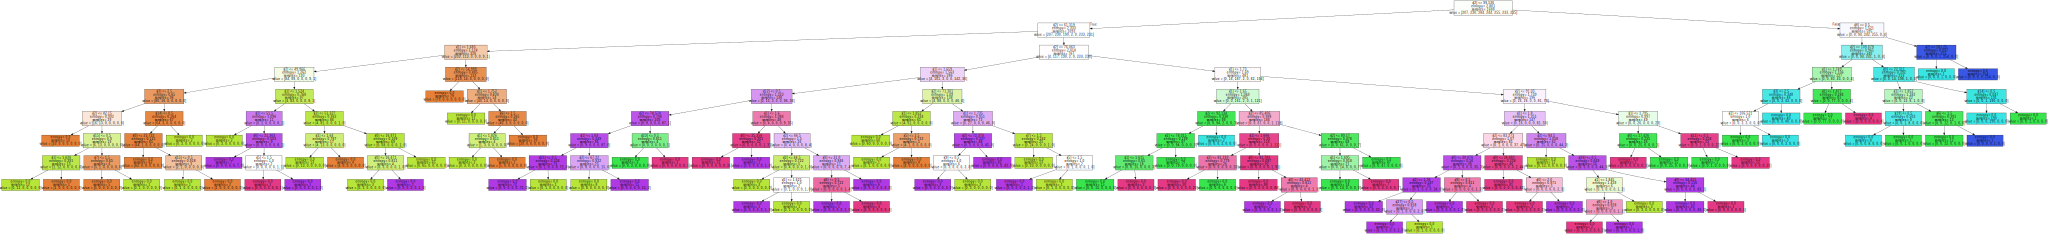

In [ ]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_sk,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(clf_sk, feature_names=list(X_train.columns))
tree_rules

'|--- Weight <= 99.54\n|   |--- Weight <= 61.32\n|   |   |--- Height <= 1.68\n|   |   |   |--- Weight <= 49.97\n|   |   |   |   |--- FCVC <= 2.50\n|   |   |   |   |   |--- Weight <= 42.15\n|   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |   |--- Weight >  42.15\n|   |   |   |   |   |   |--- CAEC_Frequently <= 0.50\n|   |   |   |   |   |   |   |--- Height <= 1.63\n|   |   |   |   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |   |   |   |--- Height >  1.63\n|   |   |   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |   |   |--- CAEC_Frequently >  0.50\n|   |   |   |   |   |   |   |--- TUE <= 1.50\n|   |   |   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |   |   |   |--- TUE >  1.50\n|   |   |   |   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |--- FCVC >  2.50\n|   |   |   |   |   |--- CAEC_Always <= 0.50\n|   |   |   |   |   |   |--- Age <= 23.72\n|   |   |   |   |   |   |   |--- class: In

#Max Depth 20

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bab-iv/ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
# df = df.drop(columns=['Height', 'Weight'])
df = df.drop(columns=['SMOKE','SCC','FAVC','MTRANS','CALC','family_history_with_overweight','CAEC'])
# print(df.shape)

In [ ]:
# Convert object/text variables to category variables
# columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

#IF SMOKE DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC",  "SCC", "CALC", "MTRANS", "NObeyesdad"]
#IF SMOKE,SCC DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "CALC", "MTRANS", "NObeyesdad"]
#IF SMOKE,SCC,FAVC DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "CAEC", "CALC", "MTRANS", "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "CAEC", "CALC", "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS, CALC DIHAPUS
# columns = ["Gender", "family_history_with_overweight", "CAEC",  "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS, CALC, family_history_with_overweigh DIHAPUS
# columns = ["Gender", "CAEC",  "NObeyesdad"]
#IF SMOKE,SCC,FAVC, MTRANS, CALC, family_history_with_overweigh,CAEC DIHAPUS
columns = ["Gender", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [ ]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [ ]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')

# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Gender      2111 non-null   category
 1   Age         2111 non-null   float64 
 2   Height      2111 non-null   float64 
 3   Weight      2111 non-null   float64 
 4   FCVC        2111 non-null   int64   
 5   NCP         2111 non-null   int64   
 6   CH2O        2111 non-null   int64   
 7   FAF         2111 non-null   int64   
 8   TUE         2111 non-null   int64   
 9   NObeyesdad  2111 non-null   category
dtypes: category(2), float64(3), int64(5)
memory usage: 136.7 KB


In [ ]:
df_prep = df.copy()

In [ ]:
# create dummy variables untuk ALL FEATURES
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])

#IF FITUR SMOKE DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","SCC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "FAVC","CAEC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC, FAVC DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC","CALC","MTRANS"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC","CALC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
#                                           "CAEC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh DIHAPUS
# df_prep = pd.get_dummies(df_prep,columns=["Gender",
#                                           "CAEC"])
#IF FITUR SMOKE,SCC, FAVC, MTRANS, family_history_with_overweigh, CAEC DIHAPUS
df_prep = pd.get_dummies(df_prep,columns=["Gender",])

df_prep

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male
0,21.000000,1.620000,64.000000,2,3,2,0,1,Normal_Weight,1,0
1,21.000000,1.520000,56.000000,3,3,3,3,0,Normal_Weight,1,0
2,23.000000,1.800000,77.000000,2,3,2,2,1,Normal_Weight,0,1
3,27.000000,1.800000,87.000000,3,3,2,2,0,Overweight_Level_I,0,1
4,22.000000,1.780000,89.800000,2,1,2,0,0,Overweight_Level_II,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3,3,2,2,1,Obesity_Type_III,1,0
2107,21.982942,1.748584,133.742943,3,3,2,1,1,Obesity_Type_III,1,0
2108,22.524036,1.752206,133.689352,3,3,2,1,1,Obesity_Type_III,1,0
2109,24.361936,1.739450,133.346641,3,3,3,1,1,Obesity_Type_III,1,0


In [ ]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad"])

# Target variable
y = df_prep['NObeyesdad']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from fuzzytree import FuzzyDecisionTreeClassifier

from sklearn.preprocessing import Normalizer # Import for standard scaling of the data

In [ ]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

#normalisasi
nor = Normalizer()
X_train_n_scaled = nor.fit_transform(X_train)
X_test_n_scaled = nor.transform(X_test)

# nor = Normalizer()
kedalaman=5

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):

    models = [
          ('Decision Tree', DecisionTreeClassifier()),
          ('Fuzzy Decision Tree',FuzzyDecisionTreeClassifier(fuzziness=0.1,max_depth=20, criterion='entropy'))
        ]

    for name, model in models:

        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)

        # normalizer scaled data
        clf_n_scaled = model.fit(X_train_n_scaled, y_train)
        y_pred_n_scaled = clf_scaled.predict(X_test_n_scaled)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        scaled_n_accuracy = round(metrics.accuracy_score(y_test, y_pred_n_scaled),5)

        # output
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_n_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
            print("                            -----------------------------------               \n")
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
            print("                            -----------------------------------               \n")
        else:
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))
            print("                            -----------------------------------               \n")

        #ditambah recall, precision, f1-score, report classification

In [ ]:
run_models(X_train, y_train, X_test, y_test)

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.94563
Accuracy w/Scaled Data (ss): 0.93853
Accuracy w/Scaled Data (mm): 0.94326
Accuracy w/Scaled Data (mm): 0.89125

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.97      0.94      0.95        65
      Normal_Weight       0.84      0.89      0.86        57
     Obesity_Type_I       0.96      0.99      0.97        67
    Obesity_Type_II       0.98      0.98      0.98        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.92      0.86      0.89        57
Overweight_Level_II       0.95      0.95      0.95        55

           accuracy                           0.95       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.95      0.95      0.95       423

                            -----------------------------------               



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FuzzyDecisionTreeClassifier was fitted without feature names
  warnings.warn(


Fuzzy Decision Tree:
---------------------------------------------------------------
Accuracy: 0.98345
Accuracy w/Scaled Data (ss): 0.98345
Accuracy w/Scaled Data (mm): 0.98345
Accuracy w/Scaled Data (mm): 0.94799

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.98      0.97        65
      Normal_Weight       0.95      0.93      0.94        57
     Obesity_Type_I       1.00      1.00      1.00        67
    Obesity_Type_II       1.00      1.00      1.00        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       1.00      0.96      0.98        57
Overweight_Level_II       0.98      1.00      0.99        55

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

                            -----------------------------------               



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_sk = DecisionTreeClassifier(criterion = 'entropy', max_depth=20).fit(X_train, y_train)
y_pred2 = clf_sk.predict(X_test)

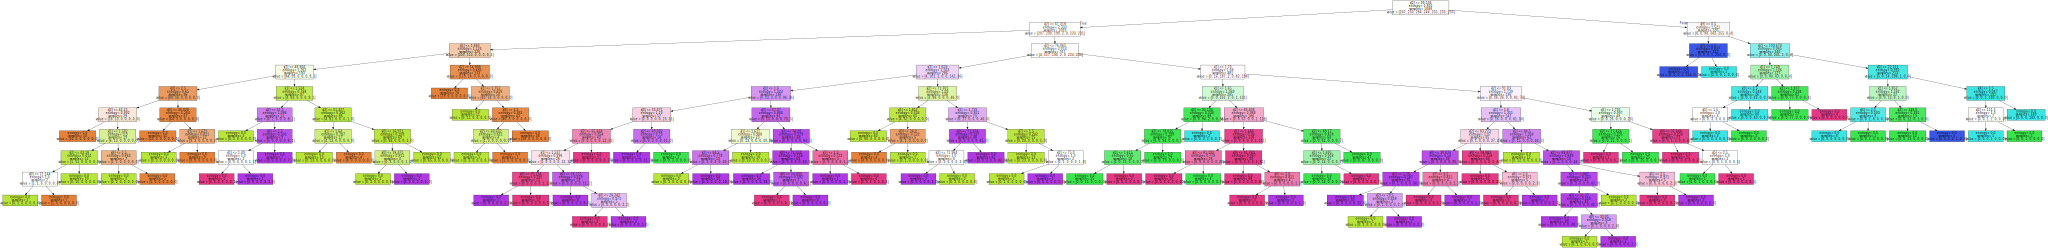

In [ ]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_sk,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(clf_sk, feature_names=list(X_train.columns))
tree_rules

'|--- Weight <= 99.54\n|   |--- Weight <= 61.32\n|   |   |--- Height <= 1.68\n|   |   |   |--- Weight <= 49.97\n|   |   |   |   |--- FCVC <= 2.50\n|   |   |   |   |   |--- Weight <= 42.15\n|   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |   |--- Weight >  42.15\n|   |   |   |   |   |   |--- Height <= 1.58\n|   |   |   |   |   |   |   |--- Weight <= 43.18\n|   |   |   |   |   |   |   |   |--- Age <= 21.14\n|   |   |   |   |   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |   |   |   |   |--- Age >  21.14\n|   |   |   |   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |   |   |   |   |--- Weight >  43.18\n|   |   |   |   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |   |   |--- Height >  1.58\n|   |   |   |   |   |   |   |--- NCP <= 1.50\n|   |   |   |   |   |   |   |   |--- class: Normal_Weight\n|   |   |   |   |   |   |   |--- NCP >  1.50\n|   |   |   |   |   |   |   |   |--- class: Insufficient_Weight\n|   |   |   |

# mari kita coba

In [ ]:
df = pd.read_csv("/content/Untitled spreadsheet - Sheet1.csv")

In [ ]:
# df = df.drop(columns=['Height', 'Weight'])
# df = df.drop(columns=['SMOKE','SCC','FAVC','MTRANS','CALC','family_history_with_overweight','CAEC'])
# df = df.drop(columns=['Age'])
# print(df.shape)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Weight  10 non-null     int64 
 1   Height  10 non-null     int64 
 2   Age     10 non-null     int64 
 3   Class   10 non-null     object
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


In [ ]:
df_prep = df.copy()

In [ ]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["Class"])

# Target variable
y = df_prep['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
from fuzzytree import FuzzyDecisionTreeClassifier

from sklearn.preprocessing import Normalizer # Import for standard scaling of the data

In [ ]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

#normalisasi
nor = Normalizer()
X_train_n_scaled = nor.fit_transform(X_train)
X_test_n_scaled = nor.transform(X_test)

# nor = Normalizer()
kedalaman=5

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):

    models = [
          ('Decision Tree', DecisionTreeClassifier()),
          ('Fuzzy Decision Tree',FuzzyDecisionTreeClassifier(fuzziness=1, max_depth=10, criterion='entropy'))
        ]

    for name, model in models:

        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)

        # normalizer scaled data
        clf_n_scaled = model.fit(X_train_n_scaled, y_train)
        y_pred_n_scaled = clf_scaled.predict(X_test_n_scaled)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        scaled_n_accuracy = round(metrics.accuracy_score(y_test, y_pred_n_scaled),5)

        # output
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_n_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
            print("                            -----------------------------------               \n")
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
            print("                            -----------------------------------               \n")
        else:
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))
            print("                            -----------------------------------               \n")

        #ditambah recall, precision, f1-score, report classification

In [ ]:
run_models(X_train, y_train, X_test, y_test)

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.6
Accuracy w/Scaled Data (ss): 0.6
Accuracy w/Scaled Data (mm): 0.6
Accuracy w/Scaled Data (mm): 0.6

Classification Report (mm):
               precision    recall  f1-score   support

 Not obesity       0.50      1.00      0.67         2
     Obesity       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5

                            -----------------------------------               

Fuzzy Decision Tree:
---------------------------------------------------------------
Accuracy: 0.6
Accuracy w/Scaled Data (ss): 0.6
Accuracy w/Scaled Data (mm): 0.6
Accuracy w/Scaled Data (mm): 0.6

Classification Report (mm):
               precision    recall  f1-score   support

 Not obesity       0.50      1.00      0.67         2
     Obesity       1.00      0.33 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FuzzyDecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_sk = DecisionTreeClassifier(criterion = 'entropy', max_depth=10).fit(X,y)
y_pred2 = clf_sk.predict(X)

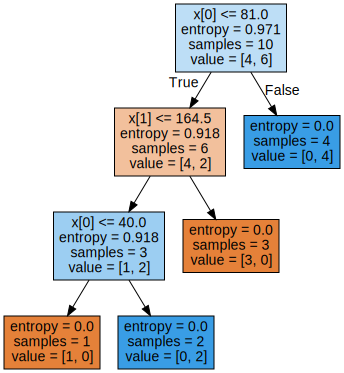

In [ ]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_sk,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(clf_sk, feature_names=list(X_train.columns))
tree_rules

'|--- Weight <= 81.00\n|   |--- Height <= 164.50\n|   |   |--- Weight <= 40.00\n|   |   |   |--- class: Not obesity\n|   |   |--- Weight >  40.00\n|   |   |   |--- class: Obesity\n|   |--- Height >  164.50\n|   |   |--- class: Not obesity\n|--- Weight >  81.00\n|   |--- class: Obesity\n'

In [ ]:
import math

def calculate_entropy(data):
    # Menghitung jumlah data dan label pada dataset
    total_data = len(data)
    label_counts = {}
    for row in data:
        label = row[-1]
        if label not in label_counts:
            label_counts[label] = 0
        label_counts[label] += 1

    # Menghitung entropy
    entropy = 0
    for label in label_counts:
        probability = label_counts[label] / total_data
        entropy -= probability * math.log2(probability)

    return entropy

def calculate_information_gain(data, attribute_index):
    # Menghitung entropy sebelum pembagian data berdasarkan atribut
    total_entropy = calculate_entropy(data)

    # Membagi data berdasarkan atribut yang dipilih
    attribute_values = {}
    for row in data:
        attribute_value = row[attribute_index]
        if attribute_value not in attribute_values:
            attribute_values[attribute_value] = []
        attribute_values[attribute_value].append(row)

    # Menghitung entropy setelah pembagian data pada setiap nilai atribut
    weighted_entropy = 0
    for attribute_value in attribute_values:
        subset_data = attribute_values[attribute_value]
        subset_entropy = calculate_entropy(subset_data)
        probability = len(subset_data) / len(data)
        weighted_entropy += probability * subset_entropy

    # Menghitung Information Gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

# Contoh penggunaan fungsi untuk menghitung Information Gain
if __name__ == "__main__":
    # Contoh dataset
    # Atribut bertipe int, class bertipe object (kategorikal)
    dataset = [
        [1, 92, 181,31, 'Obesity'],
        [2, 45, 140,14, 'Obesity'],
        [3, 35, 145,14, 'No Obesity'],
        [4, 91, 190,24, 'Obesity'],
        [5, 70, 182,23, 'No Obesity'],
        [6, 72, 185,23, 'No Obesity'],
        [7, 72, 188,35, 'No Obesity'],
        [8, 95, 190,32, 'Obesity'],
        [9, 90, 185,25, 'Obesity'],
        [10, 47, 147,14, 'Obesity'],

         ]

    # Menghitung Information Gain untuk setiap atribut (kecuali ID)
    num_attributes = len(dataset[0]) - 1
    for i in range(1, num_attributes):
        information_gain = calculate_information_gain(dataset, i)
        print(f"Information Gain for Attribute {i}: {information_gain}")

Information Gain for Attribute 1: 0.9709505944546686
Information Gain for Attribute 2: 0.7709505944546686
Information Gain for Attribute 3: 0.6954618442383218
